# E-commerce Data Analysis

## Table of Contents
1. [Introduction](#Introduction)
2. [Data Loading](#Data-Loading)
3. [Data Cleaning](#Data-Cleaning)
4. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-EDA)
5. [Monthly, Quarterly, and Yearly Summaries](#Monthly-Quarterly-and-Yearly-Summaries)
6. [Regional and Loyalty Program Analysis](#Regional-and-Loyalty-Program-Analysis)
7. [Product Performance Analysis](#Product-Performance-Analysis)
8. [Conclusion](#Conclusion)



---

## Introduction
- **Purpose**: The purpose of this project is to analyze ByteX’s sales data post-pandemic, focusing on identifying key sales trends, evaluating refund rates, and examining product performance across different regions, customer types, and sales channels. By delving into these areas, this project aims to provide ByteX with actionable insights to optimize its product offerings, strengthen customer engagement through loyalty programs, and refine marketing strategies for sustained growth.

- **Dataset Overview**:
	- This project uses two primary datasets:
		1.	`orders_data_raw.csv`: This dataset contains individual order records, including purchase timestamps, product details, customer information, and order status. It provides the foundation for analyzing sales trends, customer loyalty, and refund rates across various dimensions.
		2.	`country_lookup_raw.csv`: This dataset provides additional geographic context for each order, linking country codes to regions. It enables regional analysis.

These datasets together allow for a comprehensive view of ByteX’s sales performance, customer behavior, and geographic trends.



---

## Data Loading
Load and examine the initial structure of the datasets required for this analysis.

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Style and format preferences

# Apply the Seaborn style
plt.style.use('seaborn-v0_8-deep')
# Disable scientific notation
pd.options.display.float_format = '{:.0f}'.format

- Orders Data: Load `orders_data_raw.csv` and parse relevant columns as dates (e.g., `PURCHASE_TS`, `SHIP_TS`, etc.) to facilitate time-based analysis.
- Country Lookup Data: Load `country_lookup_raw.csv`, ensuring that `‘NA’` (North America) entries are not interpreted as missing values.

In [3]:
# Read CSV without initial date parsing
df = pd.read_csv('../Data/orders_data_raw.csv')

# List of date columns to enforce conversion with errors='coerce'
date_columns = ['PURCHASE_TS', 'SHIP_TS', 'DELIVERY_TS', 'REFUND_TS', 'CREATED_ON']

# Apply pd.to_datetime with errors='coerce' to each date column
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce', format="%m/%d/%y")

In [4]:
geo = pd.read_csv(
    '../Data/country_lookup_raw.csv'
    ,     keep_default_na=False  # prevent interpreting 'NA' (North America) as null
)

Display the first few rows of each dataset to confirm successful loading and inspect initial data structure.

In [5]:
df.head(10)

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,DELIVERY_TS,REFUND_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,LOCAL_PRICE,CURRENCY,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE,LOYALTY_PROGRAM,CREATED_ON
0,2.46E+04,5f87a27686c1,2021-04-20,2021-04-23,2021-04-26,NaT,27in 4K gaming monitor,e7e6,434,48000,JPY,website,email,mobile,JP,1,2021-02-25
1,6.25E+04,5c404f671902,2022-05-27,2022-05-29,2022-06-06,NaT,Samsung Charging Cable Pack,ab0f,24,24,USD,website,direct,desktop,US,0,2022-02-20
2,7.42E+04,424e94e485f3,2022-12-14,2022-12-15,2022-12-19,NaT,Apple Airpods Headphones,8d0d,103,104,EUR,website,direct,desktop,IT,0,2019-07-13
3,122725,6ebc18196ce4,2019-01-31,2019-02-02,2019-02-07,NaT,Samsung Charging Cable Pack,8315,24,24,USD,mobile app,email,mobile,US,0,2016-04-26
4,134439,1cea3298ca35,2021-03-14,2021-03-17,2021-03-23,NaT,Apple Airpods Headphones,e682,168,168,USD,website,direct,desktop,US,1,2021-01-20
5,1.75E+05,66b261a79276,2021-06-06,2021-06-09,2021-06-16,NaT,27in 4K gaming monitor,891b,476,345,GBP,website,direct,desktop,GB,0,2016-09-03
6,185974,508f065e0037,2020-12-10,2020-12-11,2020-12-19,NaT,27in 4K gaming monitor,891b,275,237,EUR,website,direct,desktop,BE,0,2019-04-17
7,185974,508f065e0038,2020-12-10,2020-12-11,2020-12-19,NaT,27in 4K gaming monitor,891b,275,237,EUR,website,direct,desktop,BE,0,2019-04-17
8,185974,b6e986331a39,2020-04-13,2020-04-15,2020-04-22,NaT,Apple Airpods Headphones,8d0d,148,138,EUR,website,direct,desktop,BE,0,2019-05-10
9,2.08E+05,536a1bd303a10,2022-10-21,2022-10-23,2022-10-30,NaT,Apple Airpods Headphones,e682,168,168,USD,website,email,mobile,US,1,2022-08-14


In [6]:
geo.head(10)

,COUNTRY_CODE,REGION
0,AD,EMEA
1,AE,EMEA
2,AG,NA
3,AI,NA
4,AL,EMEA
5,AM,APAC
6,AO,EMEA
7,AR,LATAM
8,AS,APAC
9,AT,EMEA


---

## Data Cleaning
Data cleaning is essential to prepare the datasets for analysis. This section focuses on ensuring consistency, handling missing values, and standardizing formats across the data.

### Standardize and Inspect
Standardize column names for easier access and inspect data structure.

In [7]:
df.columns

Index(['USER_ID', 'ORDER_ID', 'PURCHASE_TS', 'SHIP_TS', 'DELIVERY_TS',
       'REFUND_TS', 'PRODUCT_NAME', 'PRODUCT_ID', 'USD_PRICE', 'LOCAL_PRICE',
       'CURRENCY', 'PURCHASE_PLATFORM', 'MARKETING_CHANNEL',
       'ACCOUNT_CREATION_METHOD', 'COUNTRY_CODE', 'LOYALTY_PROGRAM',
       'CREATED_ON'],
      dtype='object')

In [8]:
# Standardize column names to lowercase
df.columns = df.columns.str.lower()

df.columns

Index(['user_id', 'order_id', 'purchase_ts', 'ship_ts', 'delivery_ts',
       'refund_ts', 'product_name', 'product_id', 'usd_price', 'local_price',
       'currency', 'purchase_platform', 'marketing_channel',
       'account_creation_method', 'country_code', 'loyalty_program',
       'created_on'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108127 entries, 0 to 108126
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   user_id                  108127 non-null  object        
 1   order_id                 108127 non-null  object        
 2   purchase_ts              108097 non-null  datetime64[ns]
 3   ship_ts                  108127 non-null  datetime64[ns]
 4   delivery_ts              108127 non-null  datetime64[ns]
 5   refund_ts                5379 non-null    datetime64[ns]
 6   product_name             108127 non-null  object        
 7   product_id               108127 non-null  object        
 8   usd_price                108094 non-null  float64       
 9   local_price              108127 non-null  float64       
 10  currency                 108073 non-null  object        
 11  purchase_platform        108127 non-null  object        
 12  marketing_channe

In [10]:
# Standardize column names to lowercase
geo.columns = geo.columns.str.lower()

geo.columns

Index(['country_code', 'region'], dtype='object')

In [11]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  193 non-null    object
 1   region        193 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB



### Handle Missing Values
Identify and address missing data to improve data quality.

1.	Unique Value Checks: Examine unique values in specific columns (e.g., country_code, region) to detect potential anomalies.

In [12]:
geo['country_code'].unique()

array(['AD', 'AE', 'AG', 'AI', 'AL', 'AM', 'AO', 'AR', 'AS', 'AT', 'AU',
       'AW', 'AX', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BJ',
       'BM', 'BN', 'BO', 'BQ', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA',
       'CD', 'CH', 'CI', 'CK', 'CL', 'CM', 'CN', 'CO', 'CR', 'CU', 'CV',
       'CW', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES',
       'ET', 'FI', 'FJ', 'FO', 'FR', 'GB', 'GD', 'GE', 'GF', 'GG', 'GH',
       'GI', 'GL', 'GN', 'GP', 'GR', 'GT', 'GU', 'GY', 'HK', 'HN', 'HR',
       'HT', 'HU', 'ID', 'IE', 'IL', 'IM', 'IN', 'IQ', 'IR', 'IS', 'IT',
       'JE', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KN', 'KR', 'KW', 'KY',
       'KZ', 'LA', 'LB', 'LC', 'LI', 'LK', 'LT', 'LU', 'LV', 'MA', 'MC',
       'MD', 'ME', 'MG', 'MH', 'MK', 'ML', 'MM', 'MN', 'MO', 'MP', 'MQ',
       'MR', 'MT', 'MU', 'MV', 'MW', 'MX', 'MY', 'MZ', 'NA', 'NC', 'NG',
       'NI', 'NL', 'NO', 'NP', 'NZ', 'OM', 'PA', 'PE', 'PF', 'PG', 'PH',
       'PK', 'PL', 'PR', 'PS', 'PT', 'PY', 'QA', 'R

In [13]:
geo['region'].unique()

array(['EMEA', 'NA', 'APAC', 'LATAM', '', 'x', 'North America'],
      dtype=object)

2.	Impute Missing Regions: Assign regions to countries with missing values based on prior knowledge:
	- BJ → EMEA, BM → LATAM, US → NA.

In [14]:
# impute region values for BJ and BM; missing region
geo.loc[geo['country_code'] == 'BJ', 'region'] = 'EMEA'
geo.loc[geo['country_code'] == 'BM', 'region'] = 'LATAM'
geo.loc[geo['country_code'] == 'US', 'region'] = 'NA'

In [15]:
geo['region'].unique()

array(['EMEA', 'NA', 'APAC', 'LATAM'], dtype=object)

3.	Remove Duplicates: Check for duplicate entries in country_code and remove any if found.

In [16]:
# check if duplicates exist
geo['country_code'].duplicated().sum()

np.int64(1)

In [17]:
# drop duplicate US row
geo = geo.drop_duplicates(subset='country_code')
# check null values
geo.isnull().sum()

country_code    0
region          0
dtype: int64


### Data Type Corrections
Ensure accurate data types, particularly for date columns.

1.	Date Format Consistency: Verify the minimum and maximum dates for each date column (e.g., PURCHASE_TS, SHIP_TS) to detect any parsing issues.

In [18]:
df[['purchase_ts', 'ship_ts', 'delivery_ts', 'refund_ts', 'created_on']].agg(['min', 'max'])

,purchase_ts,ship_ts,delivery_ts,refund_ts,created_on
min,2019-01-01,2019-01-02,2019-01-06,2020-11-28,2005-05-25
max,2022-12-31,2023-01-03,2023-01-10,2025-12-02,2023-01-29


2.	Product Name Standardization: Clean up product_name entries to standardize naming conventions, such as:
    - Replacing variations of “27in” with “27in 4K Gaming Monitor.”
    - Standardizing “Bose” product names to “Bose SoundSport Headphones.”

In [19]:
# see unique values in product_name
df['product_name'].unique()

array(['27in 4K gaming monitor', 'Samsung Charging Cable Pack',
       'Apple Airpods Headphones', 'ThinkPad Laptop',
       'Macbook Air Laptop', 'Samsung Webcam', '27in"" 4k gaming monitor',
       'bose soundsport headphones', 'Apple iPhone'], dtype=object)

In [20]:
# make product name that has 27in in it be = 27in 4K Gaming Monitor
df.loc[df['product_name'].str.contains('27in'), 'product_name'] = '27in 4K Gaming Monitor'

# title case product name with bose
df.loc[df['product_name'].str.contains('bose'), 'product_name'] = 'Bose SoundSport Headphones'


In [21]:
# check cleaned product names
df['product_name'].unique()

array(['27in 4K Gaming Monitor', 'Samsung Charging Cable Pack',
       'Apple Airpods Headphones', 'ThinkPad Laptop',
       'Macbook Air Laptop', 'Samsung Webcam',
       'Bose SoundSport Headphones', 'Apple iPhone'], dtype=object)

### Final Data Consistency Check
Other categorical data in our dataset (`purchase_platform`, `marketing_channel`, `account_creation_method`, etc.) seem to be clean and complete. We will not be doing any further cleaning on these columns.

Calculate and display the percentage of missing values in key columns to confirm that missing data is minimal and will not affect analysis accuracy.

In [22]:
# Define columns of interest
columns = ['currency', 'country_code', 'purchase_ts', 'usd_price', 'marketing_channel', 'account_creation_method']

# Calculate and print the percent severity of null values in each column
for col in columns:
    percent_null = df[col].isnull().mean() * 100
    print(f'{col}: {percent_null:.2f}%')

currency: 0.05%
country_code: 0.14%
purchase_ts: 0.03%
usd_price: 0.03%
marketing_channel: 1.28%
account_creation_method: 1.28%


None of the columns with NULL values have a high percentage of missing values, but it’s important to note the impact of the percentage of missing data in each column of our dataset.

In [23]:
# Add a column is_refunded to the df so it'd be easier to filter
df['is_refunded'] = df['refund_ts'].notnull()
df['is_refunded'].value_counts()

is_refunded
False    102748
True       5379
Name: count, dtype: int64


### Data Merging
Combine datasets to enrich the main data with additional context from `country_lookup_raw.csv`.

In [24]:
# join the two dataframes on country_code
df = df.merge(geo, on='country_code', how='left')
df.head(10)

,user_id,order_id,purchase_ts,ship_ts,delivery_ts,refund_ts,product_name,product_id,usd_price,local_price,currency,purchase_platform,marketing_channel,account_creation_method,country_code,loyalty_program,created_on,is_refunded,region
0,2.46E+04,5f87a27686c1,2021-04-20,2021-04-23,2021-04-26,NaT,27in 4K Gaming Monitor,e7e6,434,48000,JPY,website,email,mobile,JP,1,2021-02-25,False,APAC
1,6.25E+04,5c404f671902,2022-05-27,2022-05-29,2022-06-06,NaT,Samsung Charging Cable Pack,ab0f,24,24,USD,website,direct,desktop,US,0,2022-02-20,False,NA
2,7.42E+04,424e94e485f3,2022-12-14,2022-12-15,2022-12-19,NaT,Apple Airpods Headphones,8d0d,103,104,EUR,website,direct,desktop,IT,0,2019-07-13,False,EMEA
3,122725,6ebc18196ce4,2019-01-31,2019-02-02,2019-02-07,NaT,Samsung Charging Cable Pack,8315,24,24,USD,mobile app,email,mobile,US,0,2016-04-26,False,NA
4,134439,1cea3298ca35,2021-03-14,2021-03-17,2021-03-23,NaT,Apple Airpods Headphones,e682,168,168,USD,website,direct,desktop,US,1,2021-01-20,False,NA
5,1.75E+05,66b261a79276,2021-06-06,2021-06-09,2021-06-16,NaT,27in 4K Gaming Monitor,891b,476,345,GBP,website,direct,desktop,GB,0,2016-09-03,False,EMEA
6,185974,508f065e0037,2020-12-10,2020-12-11,2020-12-19,NaT,27in 4K Gaming Monitor,891b,275,237,EUR,website,direct,desktop,BE,0,2019-04-17,False,EMEA
7,185974,508f065e0038,2020-12-10,2020-12-11,2020-12-19,NaT,27in 4K Gaming Monitor,891b,275,237,EUR,website,direct,desktop,BE,0,2019-04-17,False,EMEA
8,185974,b6e986331a39,2020-04-13,2020-04-15,2020-04-22,NaT,Apple Airpods Headphones,8d0d,148,138,EUR,website,direct,desktop,BE,0,2019-05-10,False,EMEA
9,2.08E+05,536a1bd303a10,2022-10-21,2022-10-23,2022-10-30,NaT,Apple Airpods Headphones,e682,168,168,USD,website,email,mobile,US,1,2022-08-14,False,NA


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108127 entries, 0 to 108126
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   user_id                  108127 non-null  object        
 1   order_id                 108127 non-null  object        
 2   purchase_ts              108097 non-null  datetime64[ns]
 3   ship_ts                  108127 non-null  datetime64[ns]
 4   delivery_ts              108127 non-null  datetime64[ns]
 5   refund_ts                5379 non-null    datetime64[ns]
 6   product_name             108127 non-null  object        
 7   product_id               108127 non-null  object        
 8   usd_price                108094 non-null  float64       
 9   local_price              108127 non-null  float64       
 10  currency                 108073 non-null  object        
 11  purchase_platform        108127 non-null  object        
 12  marketing_channe

In [26]:
df.describe()

,purchase_ts,ship_ts,delivery_ts,refund_ts,usd_price,local_price,loyalty_program,created_on
count,108097,108127,108127,5379,108094,108127,108127,108127
mean,2021-01-29 23:48:40.610192640,2021-01-31 22:07:31.136163840,2021-02-06 10:05:34.073820160,2022-07-20 09:25:39.988845568,260,5271,0,2019-07-26 05:41:15.921832448
min,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-06 00:00:00,2020-11-28 00:00:00,0,0,0,2005-05-25 00:00:00
25%,2020-05-16 00:00:00,2020-05-18 00:00:00,2020-05-23 00:00:00,2022-04-10 00:00:00,50,110,0,2019-02-10 00:00:00
50%,2021-01-30 00:00:00,2021-02-01 00:00:00,2021-02-07 00:00:00,2022-08-17 00:00:00,168,168,0,2020-06-22 00:00:00
75%,2021-11-17 00:00:00,2021-11-19 00:00:00,2021-11-25 00:00:00,2023-01-08 00:00:00,329,408,1,2021-05-21 00:00:00
max,2022-12-31 00:00:00,2023-01-03 00:00:00,2023-01-10 00:00:00,2025-12-02 00:00:00,3147,2059200,1,2023-01-29 00:00:00
std,NaN,NaN,NaN,NaN,340,61012,0,NaN


---

## Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) provides an initial understanding of the data’s underlying patterns, distributions, and potential relationships between key variables.
- Objective: Analyze and visualize basic trends in the data to uncover patterns in sales, orders, and customer behavior across different dimensions.



---

### Monthly, Quarterly, and Yearly Summaries
#### Monthly Metrics
Analyze key monthly metrics, including total sales, average order value (AOV), and order growth rates. Understanding these monthly trends provides insights into seasonality, promotional impact, and business health over time.


In [27]:
# Aggregate monthly metrics grouped by purchase month
monthly_summary = df.groupby(df['purchase_ts'].dt.to_period('M').rename('purchase_month')).agg(
    total_sales=('usd_price', 'sum'),
    avg_sales=('usd_price', 'mean'),
    total_orders=('order_id', 'count')
)

# Calculate the growth rate for each metric
monthly_summary['sales_growth_rate'] = monthly_summary['total_sales'].pct_change() * 100
monthly_summary['aov_growth_rate'] = monthly_summary['avg_sales'].pct_change() * 100
monthly_summary['order_growth_rate'] = monthly_summary['total_orders'].pct_change() * 100

# Fill NaN values with 0, round, and convert to integers
monthly_summary = monthly_summary.fillna(0).round(0).astype(int)

# Apply background gradient to the growth columns with a custom colormap
styled_summary = monthly_summary.style.format("{:,}")  # Apply comma formatting
styled_summary = styled_summary.background_gradient(
    subset=['sales_growth_rate', 'aov_growth_rate', 'order_growth_rate'],
    cmap="RdYlGn",  # Red to Yellow to Green colormap
    vmin=-100,      # Set minimum for orange on the left end
    vmax=100        # Set maximum for green on the right end
)

# Display the styled DataFrame
styled_summary

,total_sales,avg_sales,total_orders,sales_growth_rate,aov_growth_rate,order_growth_rate
purchase_month,,,,,,
2019-01,"362,083",217,"1,666",0,0,0
2019-02,"246,839",219,"1,125",-32,1,-32
2019-03,"274,943",219,"1,257",11,0,12
2019-04,"271,675",221,"1,232",-1,1,-2
2019-05,"277,337",235,"1,182",2,6,-4
2019-06,"260,481",236,"1,103",-6,1,-7
2019-07,"318,074",234,"1,357",22,-1,23
2019-08,"306,657",224,"1,372",-4,-5,1
2019-09,"372,893",233,"1,598",22,4,16


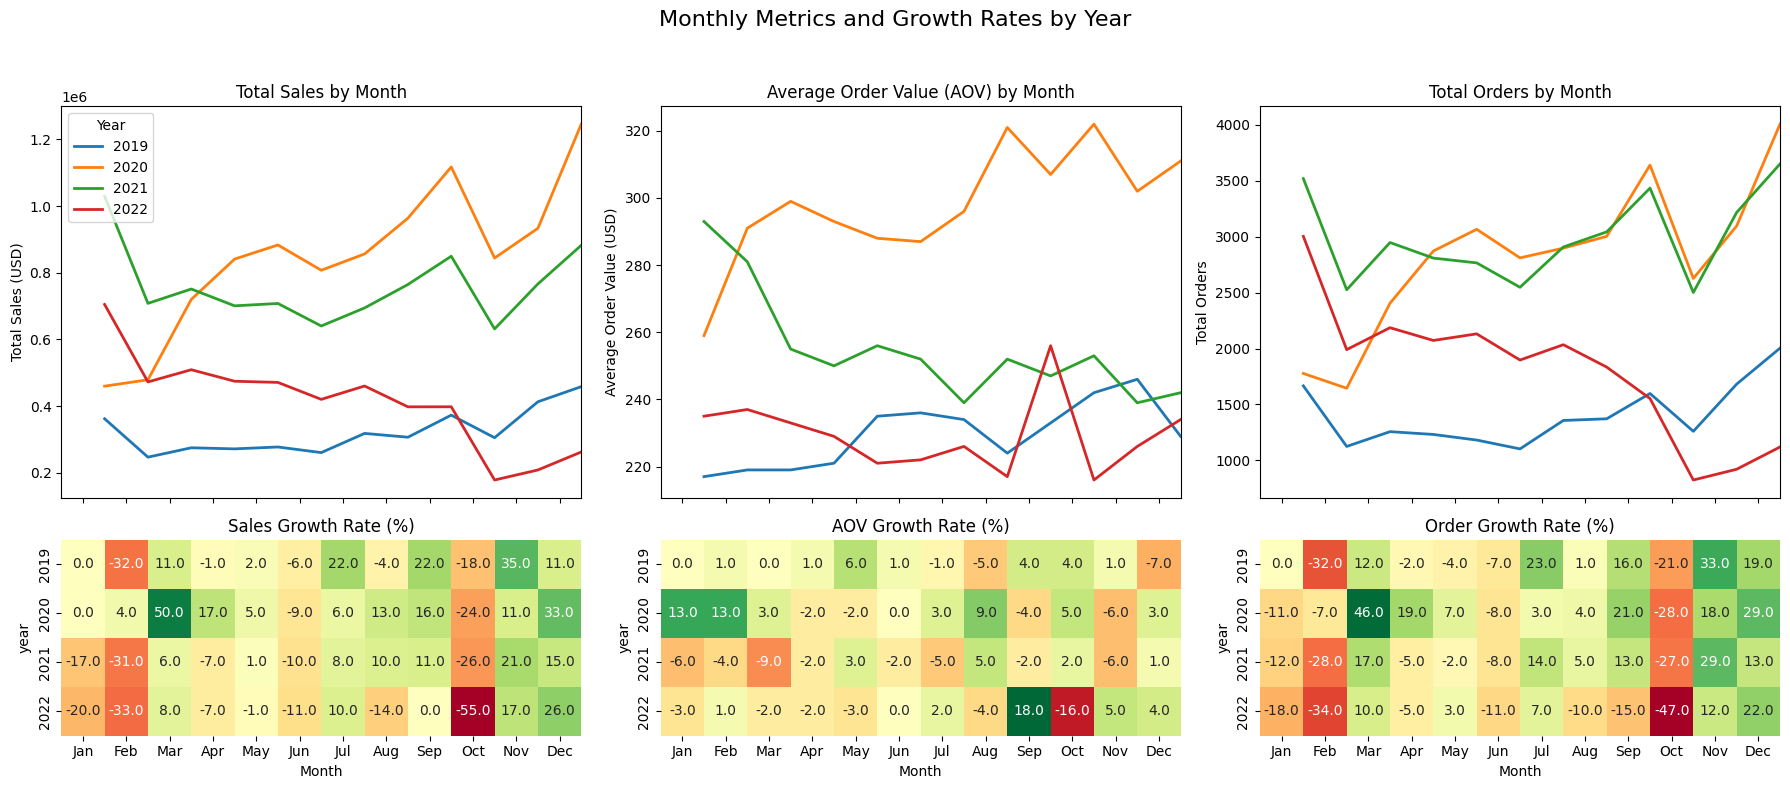

In [28]:
# Extract year and month from the date index if not already done
monthly_summary['year'] = monthly_summary.index.year
monthly_summary['month'] = monthly_summary.index.month

# Set up the figure with a 2x3 grid: 3 line charts and 3 heatmaps
fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharex='col', gridspec_kw={'height_ratios': [2, 1]})

# Define colors for each year
years = monthly_summary['year'].unique()
colors = plt.cm.tab10(np.arange(len(years)))  # Use tab10 colormap for consistent color assignment; current style is too dark

# Metrics to plot
metrics = ['total_sales', 'avg_sales', 'total_orders']
titles = ['Total Sales by Month', 'Average Order Value (AOV) by Month', 'Total Orders by Month']
y_labels = ['Total Sales (USD)', 'Average Order Value (USD)', 'Total Orders']
growth_metrics = ['sales_growth_rate', 'aov_growth_rate', 'order_growth_rate']
growth_titles = ['Sales Growth Rate (%)', 'AOV Growth Rate (%)', 'Order Growth Rate (%)']

# Plot line charts for each metric
for i, (metric, title, y_label) in enumerate(zip(metrics, titles, y_labels)):
    for j, year in enumerate(years):
        yearly_data = monthly_summary[monthly_summary['year'] == year]
        axes[0, i].plot(yearly_data['month'], yearly_data[metric], label=f'{year}', color=colors[j], linewidth=2)
    axes[0, i].set_title(title)
    axes[0, i].set_ylabel(y_label)
    axes[0, i].set_xticks(range(1, 13))
    axes[0, i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    if i == 0:
        axes[0, i].legend(title='Year', loc='upper left')

# Prepare and plot heatmaps for growth rates
for i, (growth_metric, growth_title) in enumerate(zip(growth_metrics, growth_titles)):
    growth_data = monthly_summary.pivot_table(index='year', columns='month', values=growth_metric)
    sns.heatmap(growth_data, cmap='RdYlGn', ax=axes[1, i], cbar=False, annot=True, fmt=".1f", center=0)
    axes[1, i].set_title(growth_title)
    axes[1, i].set_xticks(np.arange(0.5, 12))
    axes[1, i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[1, i].set_xlabel('Month')

# Final layout adjustments
plt.suptitle('Monthly Metrics and Growth Rates by Year', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### Quarterly Summary
Analyze key quarterly metrics, including total sales, average order value (AOV), and order growth rates. Understanding these monthly trends provides insights into seasonality, promotional impact, and business health over time.

In [29]:
# Quarterly summary
quarterly_summary = df.groupby(df['purchase_ts'].dt.to_period('Q').rename('purchase_quarter')).agg(
    total_sales=('usd_price', 'sum'),
    avg_sales=('usd_price', 'mean'),
    total_orders=('order_id', 'count')
)

# Calculate quarterly growth rates for each metric
quarterly_summary['sales_growth_rate'] = quarterly_summary['total_sales'].pct_change() * 100
quarterly_summary['aov_growth_rate'] = quarterly_summary['avg_sales'].pct_change() * 100
quarterly_summary['order_growth_rate'] = quarterly_summary['total_orders'].pct_change() * 100

# Fill NaN values with 0, round, and convert to integers
quarterly_summary = quarterly_summary.fillna(0).round(0).astype(int)

# Apply background gradient and comma formatting
styled_quarterly_summary = quarterly_summary.style.format("{:,}").background_gradient(
    subset=['sales_growth_rate', 'aov_growth_rate', 'order_growth_rate'],
    cmap="RdYlGn",
    vmin=-100,
    vmax=100
)

# Display the styled quarterly summary
styled_quarterly_summary

,total_sales,avg_sales,total_orders,sales_growth_rate,aov_growth_rate,order_growth_rate
purchase_quarter,,,,,,
2019Q1,"883,864",218,"4,048",0,0,0
2019Q2,"809,493",230,"3,517",-8,5,-13
2019Q3,"997,624",231,"4,327",23,0,23
2019Q4,"1,176,497",238,"4,945",18,3,14
2020Q1,"1,658,923",285,"5,827",41,20,18
2020Q2,"2,532,099",290,"8,746",53,2,50
2020Q3,"2,937,899",308,"9,538",16,6,9
2020Q4,"3,023,803",311,"9,726",3,1,2
2021Q1,"2,489,148",277,"8,990",-18,-11,-8



#### Yearly Summary
Analyze key yearly metrics, including total sales, average order value (AOV), and order growth rates. Understanding these monthly trends provides insights into seasonality, promotional impact, and business health over time.


In [30]:
# Yearly summary
yearly_summary = df.groupby(df['purchase_ts'].dt.to_period('Y').rename('purchase_year')).agg(
    total_sales=('usd_price', 'sum'),
    avg_sales=('usd_price', 'mean'),
    total_orders=('order_id', 'count')
)

# Calculate yearly growth rates for each metric
yearly_summary['sales_growth_rate'] = yearly_summary['total_sales'].pct_change() * 100
yearly_summary['aov_growth_rate'] = yearly_summary['avg_sales'].pct_change() * 100
yearly_summary['order_growth_rate'] = yearly_summary['total_orders'].pct_change() * 100

# Fill NaN values with 0, round, and convert to integers
yearly_summary = yearly_summary.fillna(0).round(0).astype(int)

# Apply background gradient and comma formatting
styled_yearly_summary = yearly_summary.style.format("{:,}").background_gradient(
    subset=['sales_growth_rate', 'aov_growth_rate', 'order_growth_rate'],
    cmap="RdYlGn",
    vmin=-100,
    vmax=100
)

# Display the styled yearly summary
styled_yearly_summary

,total_sales,avg_sales,total_orders,sales_growth_rate,aov_growth_rate,order_growth_rate
purchase_year,,,,,,
2019,"3,867,478",230,"16,837",0,0,0
2020,"10,152,725",300,"33,837",163,31,101
2021,"9,127,894",255,"35,858",-10,-15,6
2022,"4,957,580",230,"21,565",-46,-10,-40


---

### Regional and Loyalty Program Analysis
#### Regional Sales Trends
Analyze sales patterns across different regions to identify geographic performance variations and growth opportunities. This analysis provides insight into regional trends, helping to inform targeted strategies for market expansion and tailored marketing efforts.

In [31]:
# Annual summary grouped by region and year
yearly_region_summary = df.groupby(['region', df['purchase_ts'].dt.to_period('Y').rename('purchase_year')]).agg(
    total_sales=('usd_price', 'sum'),
    avg_sales=('usd_price', 'mean'),
    total_orders=('order_id', 'count')
)

# Calculate the growth rate for each metric within each region
yearly_region_summary['sales_growth_rate'] = yearly_region_summary.groupby('region')['total_sales'].pct_change() * 100
yearly_region_summary['aov_growth_rate'] = yearly_region_summary.groupby('region')['avg_sales'].pct_change() * 100
yearly_region_summary['order_growth_rate'] = yearly_region_summary.groupby('region')['total_orders'].pct_change() * 100

# Fill NaN values with 0, round, and convert to integers
yearly_region_summary = yearly_region_summary.fillna(0).round(0).astype(int)

# Apply background gradient and comma formatting
styled_yearly_region_summary = yearly_region_summary.style.format("{:,}").background_gradient(
    subset=['sales_growth_rate', 'aov_growth_rate', 'order_growth_rate'],
    cmap="RdYlGn",
    vmin=-100,
    vmax=100
)

# Display the styled yearly region summary
styled_yearly_region_summary

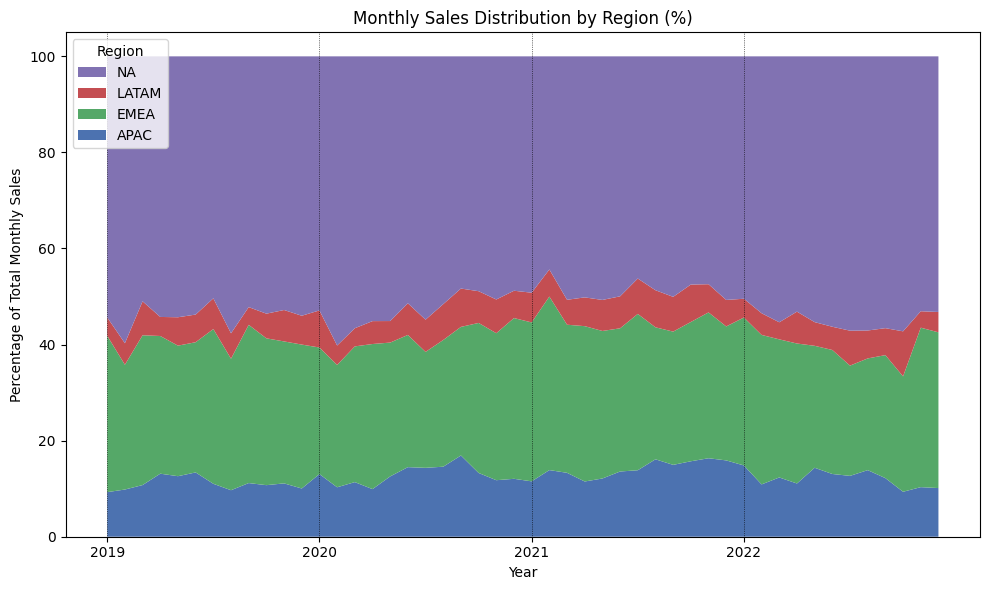

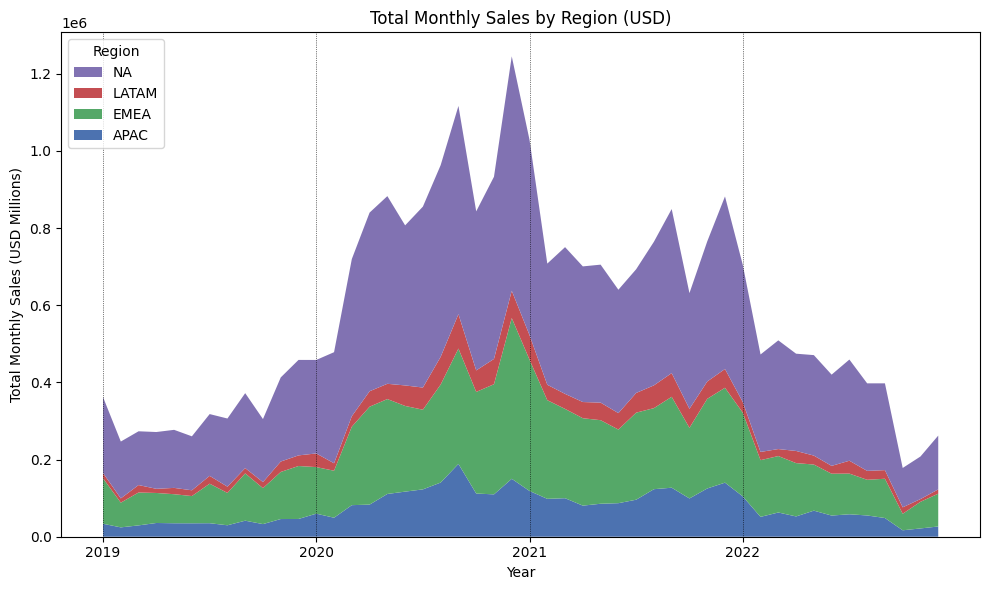

In [32]:
# Group by 'region' and 'month' to calculate monthly total sales
monthly_sales = df.groupby([df['purchase_ts'].dt.to_period('M'), 'region'])['usd_price'].sum().unstack(fill_value=0)

# Normalize to get the percentage contribution of each region per month
monthly_sales_percent = monthly_sales.div(monthly_sales.sum(axis=1), axis=0) * 100

# Define a function to plot stacked area charts with yearly markers and yearly x-axis labels
def plot_stacked_area(data, title, ylabel):
    plt.figure(figsize=(10, 6))
    plt.stackplot(data.index.astype(str), data.T, labels=data.columns)

    # Add vertical lines at the start of each year
    years = sorted(data.index.year.unique())
    for year in years:
        plt.axvline(x=f'{year}-01', color='black', linestyle=':', linewidth=0.5)

    # Reverse legend order to match stacking
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[::-1], labels[::-1], loc='upper left', title='Region')

    # Set titles and labels
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(ylabel)

    # Show only years on the x-axis labels
    plt.xticks([f"{year}-01" for year in years], [str(year) for year in years])

    plt.tight_layout()
    plt.show()

# Plot the percentage stacked area chart
plt.style.use('seaborn-v0_8-deep')
plot_stacked_area(
    monthly_sales_percent,
    title='Monthly Sales Distribution by Region (%)',
    ylabel='Percentage of Total Monthly Sales'
)

# Plot the total sales stacked area chart
plot_stacked_area(
    monthly_sales,
    title='Total Monthly Sales by Region (USD)',
    ylabel='Total Monthly Sales (USD Millions)'
)


#### Loyalty Program Impact
Evaluate the effect of ByteX’s loyalty program on key metrics such as revenue, order volume, average order value (AOV), and refund rates. This analysis helps assess the effectiveness of the loyalty program in driving customer engagement and repeat purchases.

In [33]:
# Aggregate yearly metrics grouped by purchase year and loyalty_program
df_yearly_loyalty = df.groupby(['loyalty_program', df['purchase_ts'].dt.to_period('Y').rename('purchase_year')]).agg(
    revenue=('usd_price', 'sum'),
    order_count=('order_id', 'count'),
    aov=('usd_price', 'mean')
)

# Calculate growth rates as percentages for each metric within each loyalty program
df_yearly_loyalty['revenue_growth'] = df_yearly_loyalty.groupby('loyalty_program')['revenue'].pct_change() * 100
df_yearly_loyalty['order_count_growth'] = df_yearly_loyalty.groupby('loyalty_program')['order_count'].pct_change() * 100
df_yearly_loyalty['aov_growth'] = df_yearly_loyalty.groupby('loyalty_program')['aov'].pct_change() * 100

# Fill NaN values with 0, round to remove decimals, and convert to integers
df_yearly_loyalty = df_yearly_loyalty.fillna(0).round(0).astype(int)

# Apply background gradient and comma-separated formatting for better readability
styled_df_yearly_loyalty = df_yearly_loyalty.style.format("{:,}").background_gradient(
    subset=['revenue_growth', 'order_count_growth', 'aov_growth'],
    cmap="RdYlGn",  # Red to Yellow to Green colormap
    vmin=-100,      # Set minimum for red/orange on the left end
    vmax=100        # Set maximum for green on the right end
)

# Display the styled DataFrame
styled_df_yearly_loyalty

##### Loyalty Program Impact on Relevant Metrics

/var/folders/zc/y15z5jlx6sdg3444ndgx0v5r0000gn/T/ipykernel_30160/96147563.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels([f'{int(y/1000)}K' for y in y_ticks])


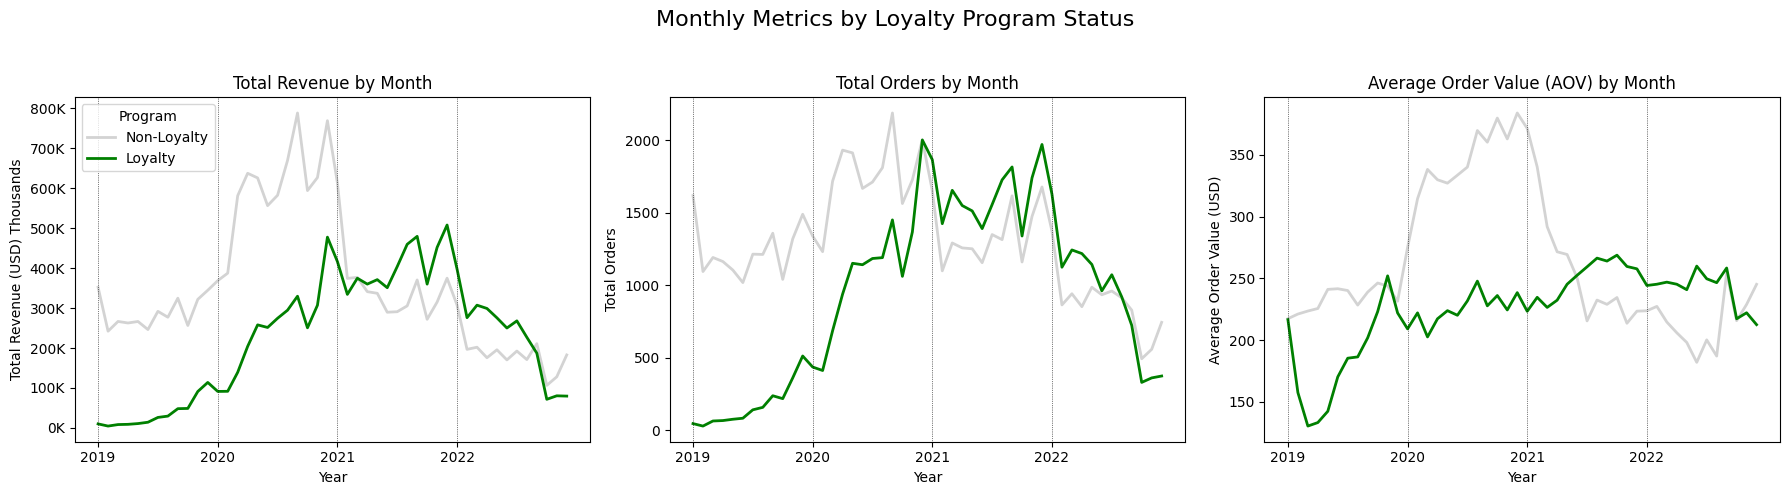

In [34]:
# Group by loyalty_program and month, using 'YYYY-MM' as the period
df_monthly_loyalty = df.groupby(['loyalty_program', df['purchase_ts'].dt.to_period('M').rename('purchase_month')]).agg(
    revenue=('usd_price', 'sum'),
    order_count=('order_id', 'count'),
    aov=('usd_price', 'mean')
).reset_index()

# Set up the figure with a 1x3 grid: 3 line charts for metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# Define colors for loyalty and non-loyalty programs
programs = df_monthly_loyalty['loyalty_program'].unique()
colors = {0: 'lightgrey', 1: 'green'}  # Non-loyalty = light grey, Loyalty = green

# Metrics and titles for plotting
metrics = ['revenue', 'order_count', 'aov']
titles = ['Total Revenue by Month', 'Total Orders by Month', 'Average Order Value (AOV) by Month']
y_labels = ['Total Revenue (USD) Thousands', 'Total Orders', 'Average Order Value (USD)']

# Plot line charts for each metric by month
for i, (metric, title, y_label) in enumerate(zip(metrics, titles, y_labels)):
    for program in programs:
        data = df_monthly_loyalty[df_monthly_loyalty['loyalty_program'] == program]
        axes[i].plot(data['purchase_month'].astype(str), data[metric],
                     label='Loyalty' if program == 1 else 'Non-Loyalty',
                     color=colors[program], linewidth=2)
    axes[i].set_title(title)
    axes[i].set_ylabel(y_label)
    axes[i].set_xlabel('Year')
    
    # Show only years on the x-axis labels
    years = sorted(data['purchase_month'].dt.year.unique())
    axes[i].set_xticks([f"{year}-01" for year in years])
    axes[i].set_xticklabels([str(year) for year in years])
    
    # Add vertical lines to mark the start of each year
    for year in years:
        axes[i].axvline(x=f"{year}-01", color='black', linestyle=':', linewidth=0.5)

    # Apply y-axis label formatting for revenue in thousands (e.g., 800000 -> 800K)
    if metric == 'revenue':
        y_ticks = axes[i].get_yticks()
        axes[i].set_yticklabels([f'{int(y/1000)}K' for y in y_ticks])
    
    if i == 0:
        axes[i].legend(title='Program', loc='upper left')

# Final layout adjustments
plt.suptitle('Monthly Metrics by Loyalty Program Status', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##### Loyalty Program Impact on Order Volume Over Time

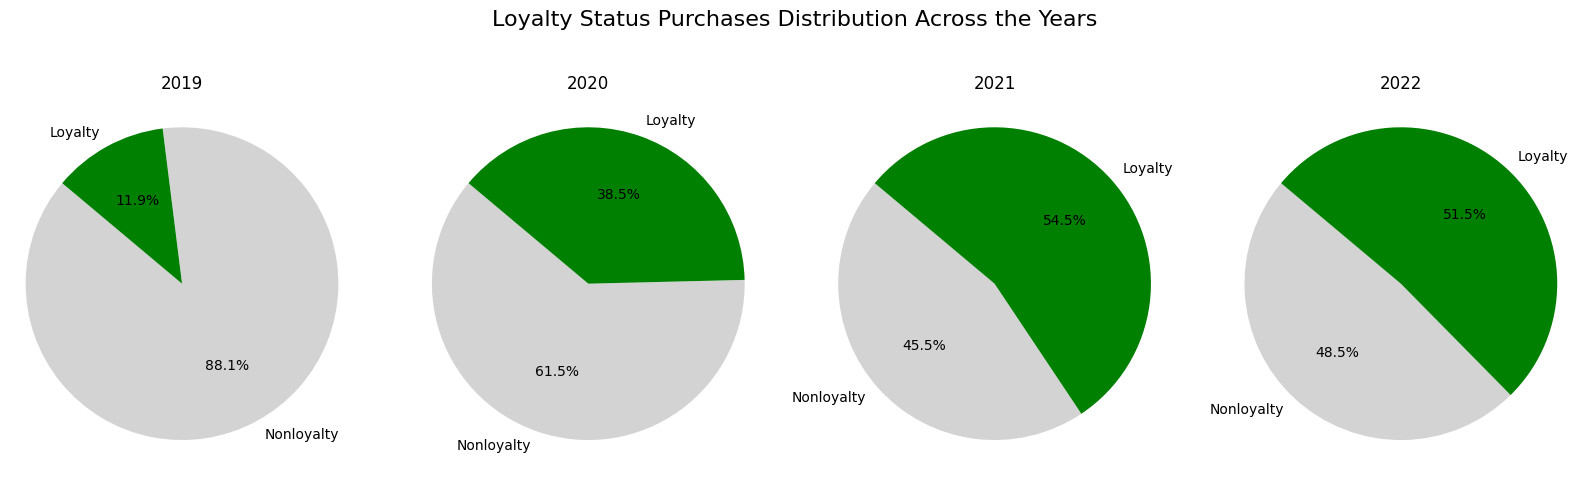

In [35]:
# Create a DataFrame with the count of orders by loyalty status and year
loyalty_pie_data = df.groupby([df['purchase_ts'].dt.year.rename('year'), 'loyalty_program'])['order_id'].count().unstack()

# Set up a grid of subplots (one for each year)
num_years = loyalty_pie_data.shape[0]
fig, axes = plt.subplots(1, num_years, figsize=(4 * num_years, 5))

# Define colors for 'Loyalty' and 'Nonloyalty'
colors = ['lightgrey', 'green']  # Nonloyalty = light blue, Loyalty = blue

# Loop through each year and create a pie chart in each subplot
for i, (year, data) in enumerate(loyalty_pie_data.iterrows()):
    ax = axes[i] if num_years > 1 else axes  # Handle case where there's only one subplot
    ax.pie(data, labels=['Nonloyalty', 'Loyalty'], autopct='%1.1f%%', startangle=140, colors=colors)
    ax.set_title(int(year))  # Display year as integer only
    ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Add overarching title
fig.suptitle('Loyalty Status Purchases Distribution Across the Years', fontsize=16)

# Adjust layout for a cleaner look
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for the overarching title
plt.show()

##### Loyalty Program Impact on Refund Metrics

In [36]:
# Aggregate yearly refund metrics grouped by loyalty_program and purchase year
df_yearly_refunds = df.groupby(['loyalty_program', df['purchase_ts'].dt.to_period('Y').rename('purchase_year')]).agg(
    order_count=('order_id', 'count'),
    refund_count=('is_refunded', 'sum'),
    refund_rate=('is_refunded', lambda x: x.mean() * 100)  # Calculate refund rate as a percentage
)

# Calculate growth rate as percentage for order_count within each loyalty program
df_yearly_refunds['order_count_growth'] = df_yearly_refunds.groupby('loyalty_program')['order_count'].pct_change() * 100

# Fill NaN values with 0, round, and convert to integers
df_yearly_refunds = df_yearly_refunds.fillna(0).round(0).astype(int)

# Apply background gradient and comma-separated formatting for readability
styled_df_yearly_refunds = df_yearly_refunds.style.format("{:,}").background_gradient(
    subset=['order_count_growth'],
    cmap="RdYlGn",  # Red to Yellow to Green colormap
    vmin=-100,      # Set minimum for red/orange on the left end
    vmax=100        # Set maximum for green on the right end
)

# Display the styled DataFrame
styled_df_yearly_refunds


---

### Product Performance Analysis
Assess the performance of individual products, focusing on key metrics such as total revenue, average order value (AOV), order count, and refund rates. This analysis identifies top-performing products and highlights areas for potential product improvement.

In [37]:
# Aggregation for each product with inline calculations for percentages
product_performance = df.groupby('product_name').agg(
    total_revenue=('usd_price', 'sum'),
    total_revenue_pct=('usd_price', lambda x: x.sum() / df['usd_price'].sum() * 100),
    aov=('usd_price', 'mean'),
    order_count=('order_id', 'count'),
    order_count_pct=('order_id', lambda x: x.count() / df['order_id'].count() * 100),
    refund_rate=('is_refunded', 'mean'),  # Refund rate as percentage of refunded orders
    refund_count=('is_refunded', 'sum')
)

# Convert Refund Rate to percentage format
product_performance['refund_rate'] *= 100

# Sort by Total Revenue in descending order
product_performance = product_performance.sort_values(by='total_revenue', ascending=False)

# Round values to two decimal places
product_performance = product_performance.round(2)

# Apply background gradients and comma formatting
styled_product_performance = product_performance.style.format("{:,.2f}").background_gradient(
    subset=['aov', 'total_revenue_pct', 'order_count_pct'],
    cmap="Greens",  # White to Green gradient
    vmin=0
).background_gradient(
    subset=['refund_rate'],
    cmap="Reds",    # White to Red gradient
    vmin=0
)

# Display the styled DataFrame
styled_product_performance

,total_revenue,total_revenue_pct,aov,order_count,order_count_pct,refund_rate,refund_count
product_name,,,,,,,
27in 4K Gaming Monitor,"9,850,744.00",35.04,420.83,"23,408.00",21.65,6.17,"1,445.00"
Apple Airpods Headphones,"7,739,617.46",27.53,159.90,"48,404.00",44.77,5.45,"2,636.00"
Macbook Air Laptop,"6,295,309.41",22.39,"1,588.12","3,964.00",3.67,11.43,453.00
ThinkPad Laptop,"3,206,316.22",11.41,"1,099.56","2,916.00",2.70,11.76,343.00
Samsung Charging Cable Pack,"442,627.71",1.57,20.20,"21,923.00",20.28,1.34,294.00
Samsung Webcam,"361,897.76",1.29,50.43,"7,197.00",6.66,2.58,186.00
Apple iPhone,"213,327.59",0.76,740.72,288.00,0.27,7.64,22.00
Bose SoundSport Headphones,"3,339.04",0.01,123.67,27.00,0.02,0.00,0.00


---

## Conclusion

See the [README.md](../README.md) file for a detailed conclusion.

---